In [22]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb

In [3]:
titanic=pd.read_csv('titanic.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.shape

(891, 12)

In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

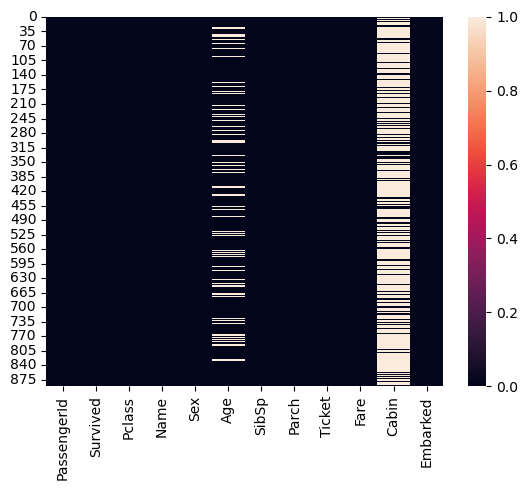

In [9]:
sb.heatmap(titanic.isnull())

In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
titanic=titanic.drop(['Cabin','Name','Fare','Ticket','PassengerId'],axis=1)#dropped because no importance for the columns

In [12]:
def myageclean(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        else:
            return 25
    else:
        return Age

In [14]:
import warnings
warnings.filterwarnings("ignore")
titanic['Age']=titanic[['Age','Pclass']].apply(myageclean,axis=1)

In [15]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

<Axes: >

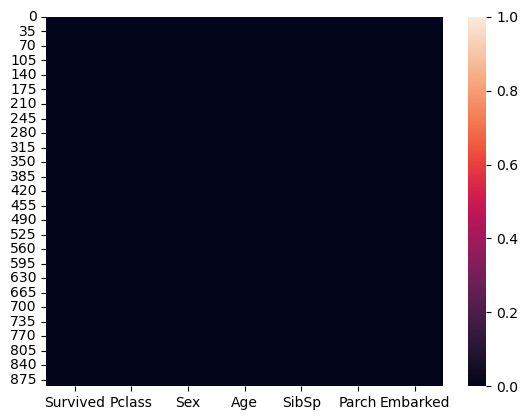

In [16]:
sb.heatmap(titanic.isnull())

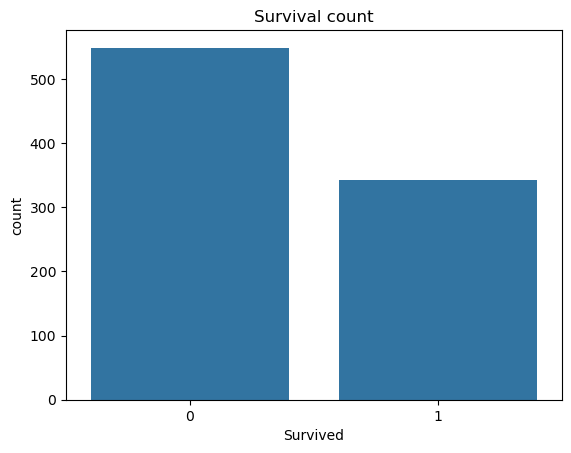

In [23]:
#Univariate Analysis
sb.countplot(data=titanic,x='Survived')
pt.title('Survival count')
pt.show()

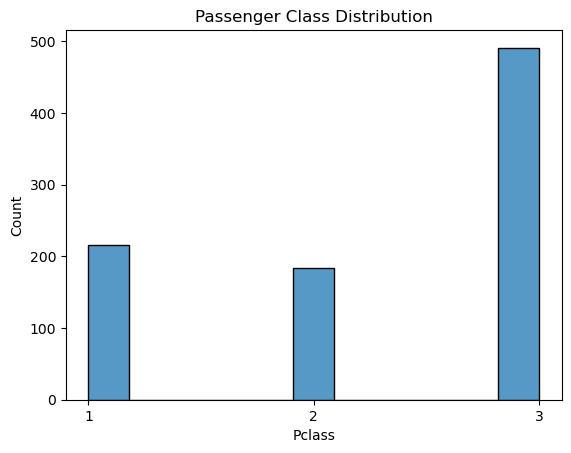

In [28]:
sb.histplot(titanic['Pclass'])
pt.title("Passenger Class Distribution")
pt.xlabel("Pclass")
pt.ylabel("Count")
pt.xticks([1,2,3])
pt.show()

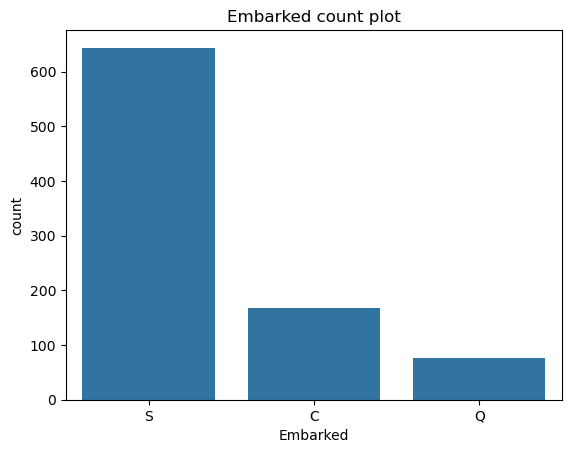

In [29]:
sb.countplot(data=titanic,x='Embarked')
pt.title('Embarked count plot')
pt.show()

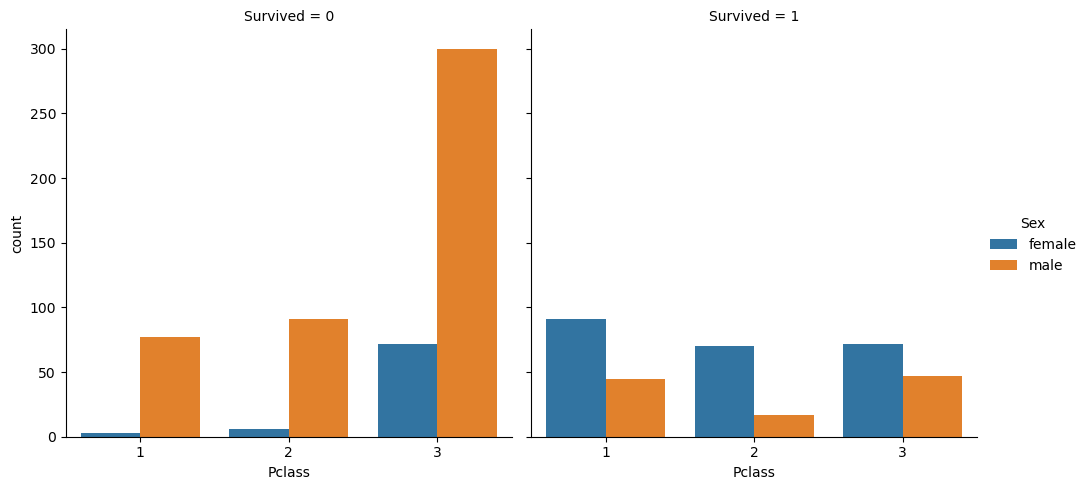

In [33]:
#'Survival by Gender and Class'
sb.catplot(x="Pclass",hue="Sex",col="Survived",kind="count",data=titanic)
pt.show()

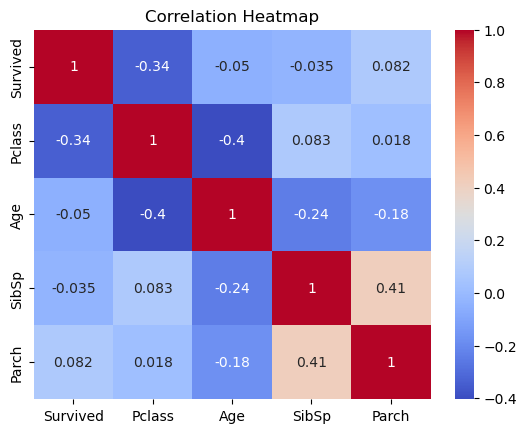

In [40]:
corr = titanic.corr(numeric_only=True)
sb.heatmap(corr,annot=True,cmap="coolwarm")
pt.title("Correlation Heatmap")
pt.show()